In [2]:
import datetime
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import quantstats as qs
import pandas_ta as ta
from utils import backtest, Strategy, tool
from utils.simulation import simulation
warnings.filterwarnings("ignore")

In [2]:
binance_df = pd.read_csv(fr'C:\Users\garet\OneDrive\文件\Crypto Trading\github\data\Binance\Binance_1h_BTCUSDT-futures.csv', index_col=0)
raw_data_df = pd.read_csv(fr"C:\Users\garet\OneDrive\文件\Crypto Trading\github\glassnode data\BTC_1h_realized_volatility_all_in_binance.csv", index_col=0)
binance_df.index = pd.to_datetime(binance_df.index)
raw_data_df.index = pd.to_datetime(raw_data_df.index)

In [3]:
def add_delay(df, delay = 0*60):
    df = df.copy()
    df.index = df.index + timedelta(minutes=delay)
    return df

In [4]:
data_df = add_delay(raw_data_df, delay=2*60)
data_df = data_df[~raw_data_df.index.duplicated(keep='last')]
combined_df = pd.merge(binance_df['close'], raw_data_df,left_index=True, right_index=True, how='inner', suffixes=('_bn', '_cb'))
combined_df

,close,1m,1w,1y,2w,3m,6m
2019-12-01 00:00:00,7481.99,51.176260,66.750316,71.003814,67.731074,66.795571,77.913631
2019-12-01 01:00:00,7394.38,51.245772,67.160165,71.001813,67.817953,66.816824,77.920055
2019-12-01 02:00:00,7312.00,51.323762,67.610722,70.997733,67.922234,66.840775,77.928117
2019-12-01 03:00:00,7286.85,51.468055,68.331365,70.993772,68.133051,66.882551,77.941852
2019-12-01 04:00:00,7331.62,51.609022,69.027204,70.990620,68.338472,66.923359,77.954465
...,...,...,...,...,...,...,...
2024-08-23 01:00:00,60727.90,67.558959,37.797970,48.895557,47.339536,51.101128,55.437483
2024-08-23 02:00:00,60598.80,67.560191,37.679901,48.895606,46.822562,51.100528,55.437610
2024-08-23 03:00:00,60565.10,67.561917,37.642174,48.895596,46.359638,51.100300,55.436951
2024-08-23 04:00:00,60683.20,67.561728,37.605316,48.895564,45.813711,51.100083,55.436313


In [5]:
start = datetime(2021,1,1,0,0,0)
end = datetime(2024,6,30,0,0,0)
interval = '1h'
heatmap_analyzer = backtest.HeatmapAnalyzer(5000,3,100,0,0,10, combined_df, start, end, 0.7, Strategy.Bbands_flat_zero,'Futures','1m','Momentum',interval)

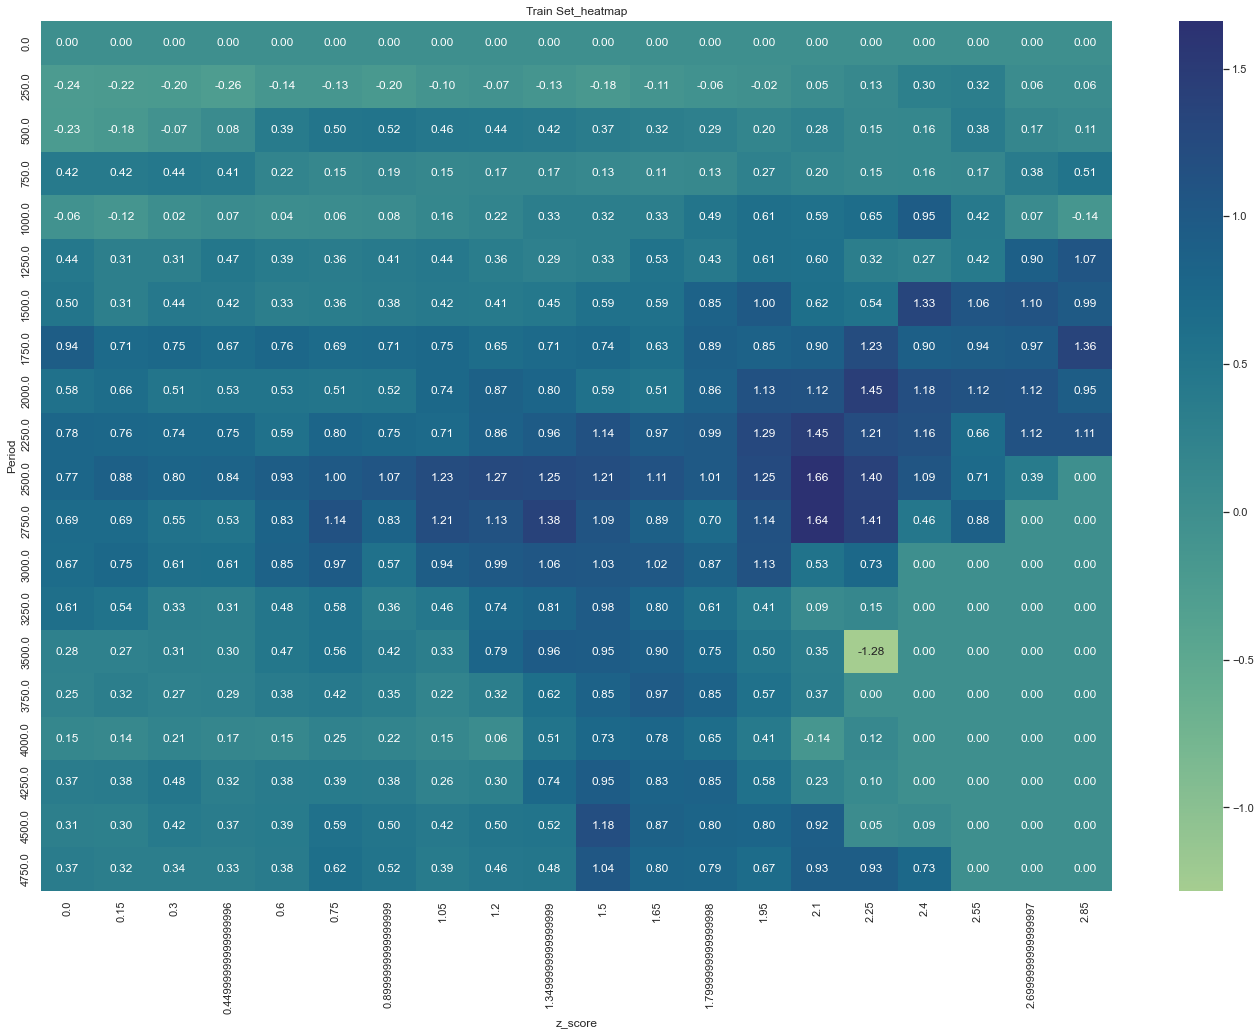

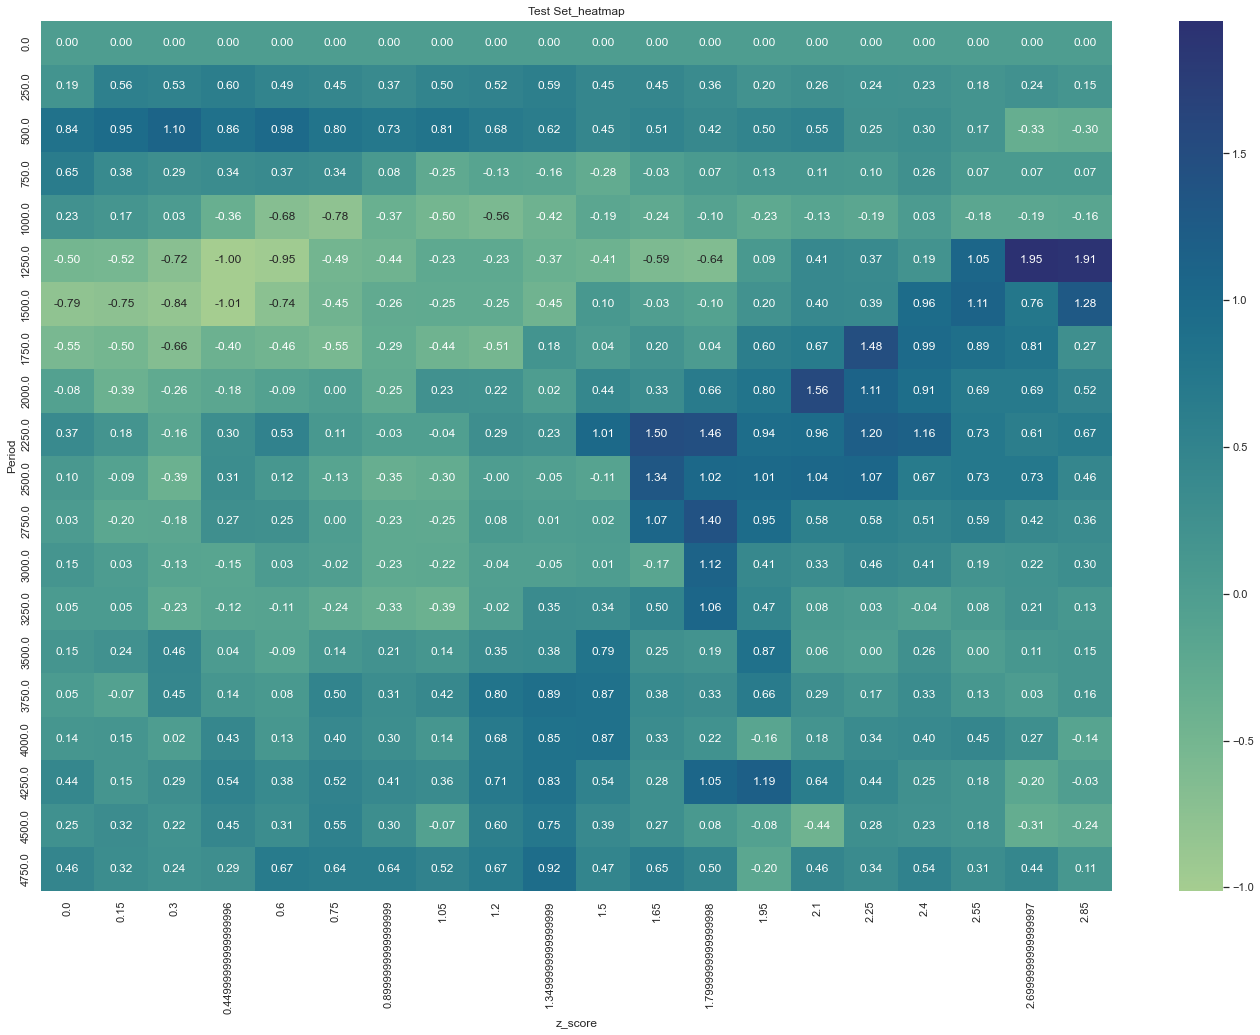

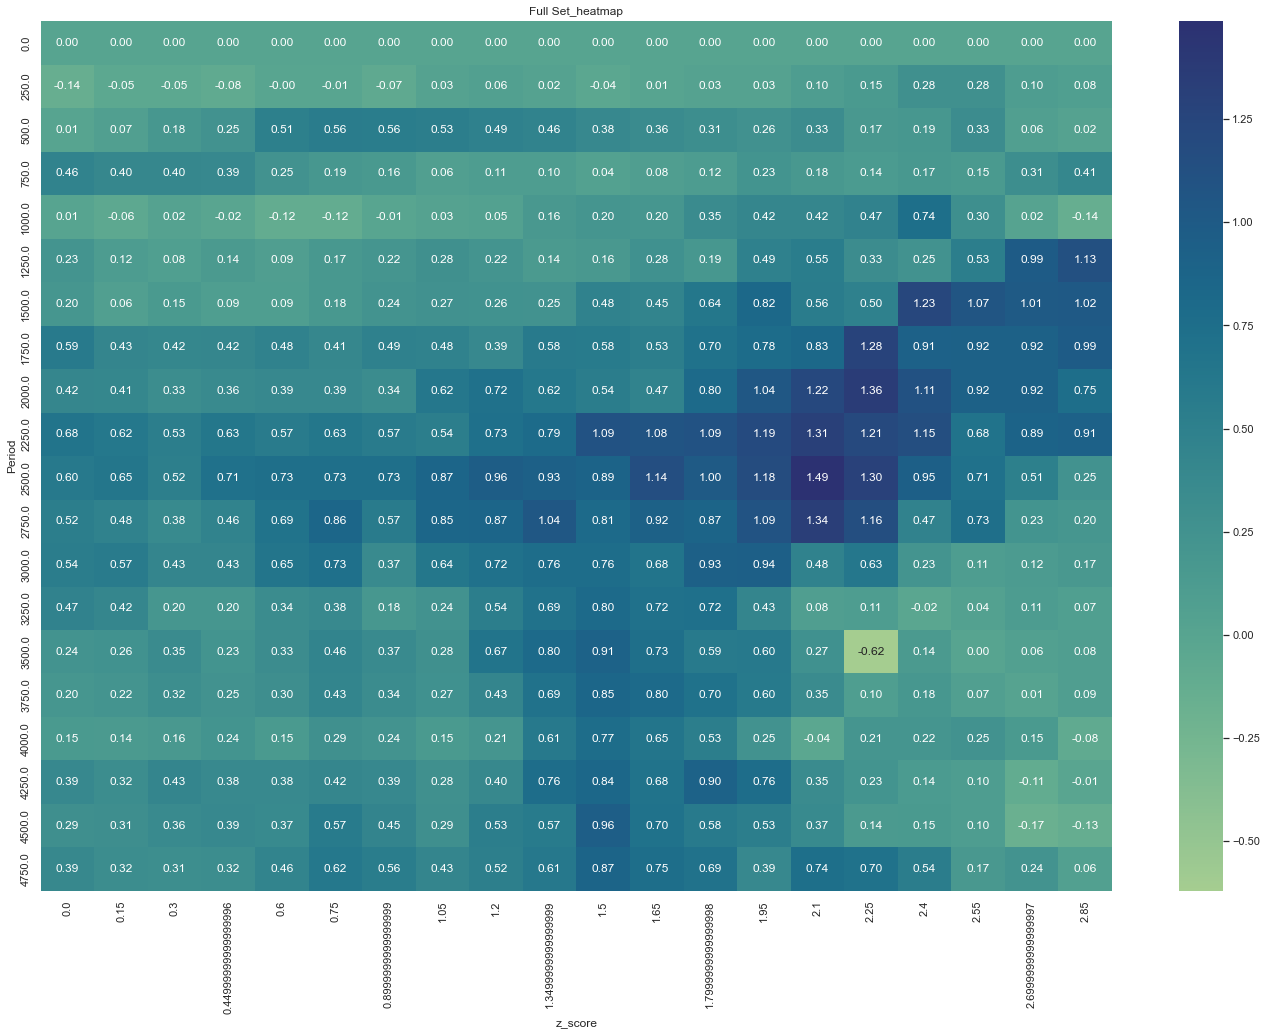

In [7]:
tool.generate_heatmap(*heatmap_analyzer.get_heatmap())

In [8]:
test_df = combined_df.loc[start:end]
test = Strategy.Bbands_flat_zero(test_df,250,1.35,'Futures','1m','Momentum')

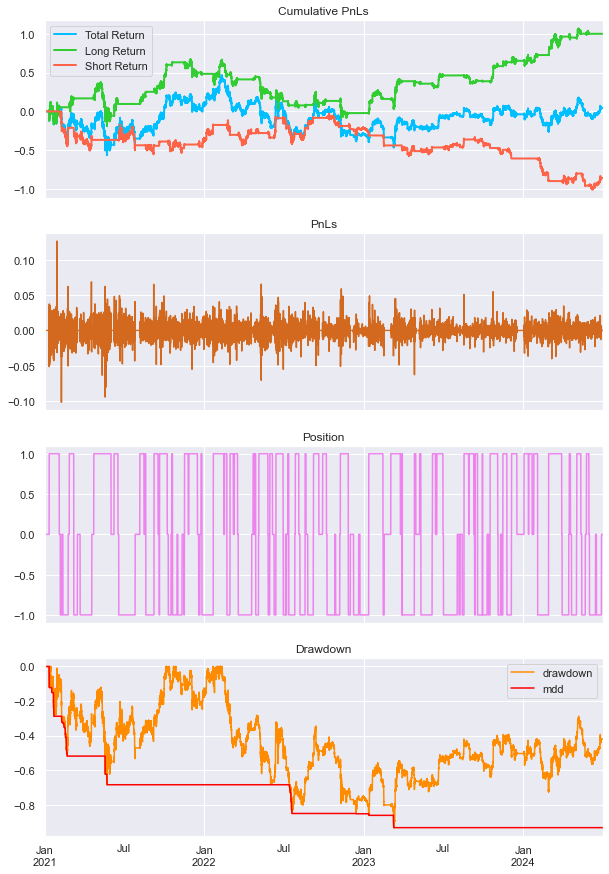

{'custom_msg': '1440,0.9',
 'stats': {'custom_msg': '1440,0.9',
  'start_time': Timestamp('2021-01-01 00:00:00'),
  'end_time': Timestamp('2024-06-30 00:00:00'),
  'cumulative_return': 0.04653476913934296,
  'daily_return': 3.644069627199919e-05,
  'annual_return': 0.013300854139279703,
  'transaction_cost': 0.194,
  'sharpe_ratio': 0.02270623892580387,
  'annualized_sharpe_ratio': 0.022876943119542626,
  'apy': 0.013311278006160016,
  'calmar_ratio': 0.01425435885328262,
  'maximum_drawdown': 0.9331078497589995,
  'current_drawdown': 0.42018308976127694,
  'total_trade_count': 97,
  'long_trade_count': 49,
  'short_trade_count': 48,
  'win_trade_count': 46,
  'loss_trade_count': 51,
  'win_rate': 0.4742268041237113,
  'max_win_trade': 0.33235043097860073,
  'max_loss_trade': -0.25207291256332465,
  'drawdown_periods': datetime.timedelta(days=264)}}

In [9]:
from analyser import CustomStrategyBacktester
# result = CustomStrategyBacktester(test,'','10m','1320,1.3')
result = CustomStrategyBacktester(test,'','1h','1440,0.9')
result.strategy_statistics()
result.strategy_performance_plot()

<AxesSubplot:title={'center':'Cumulative Return'}, xlabel='date_time'>

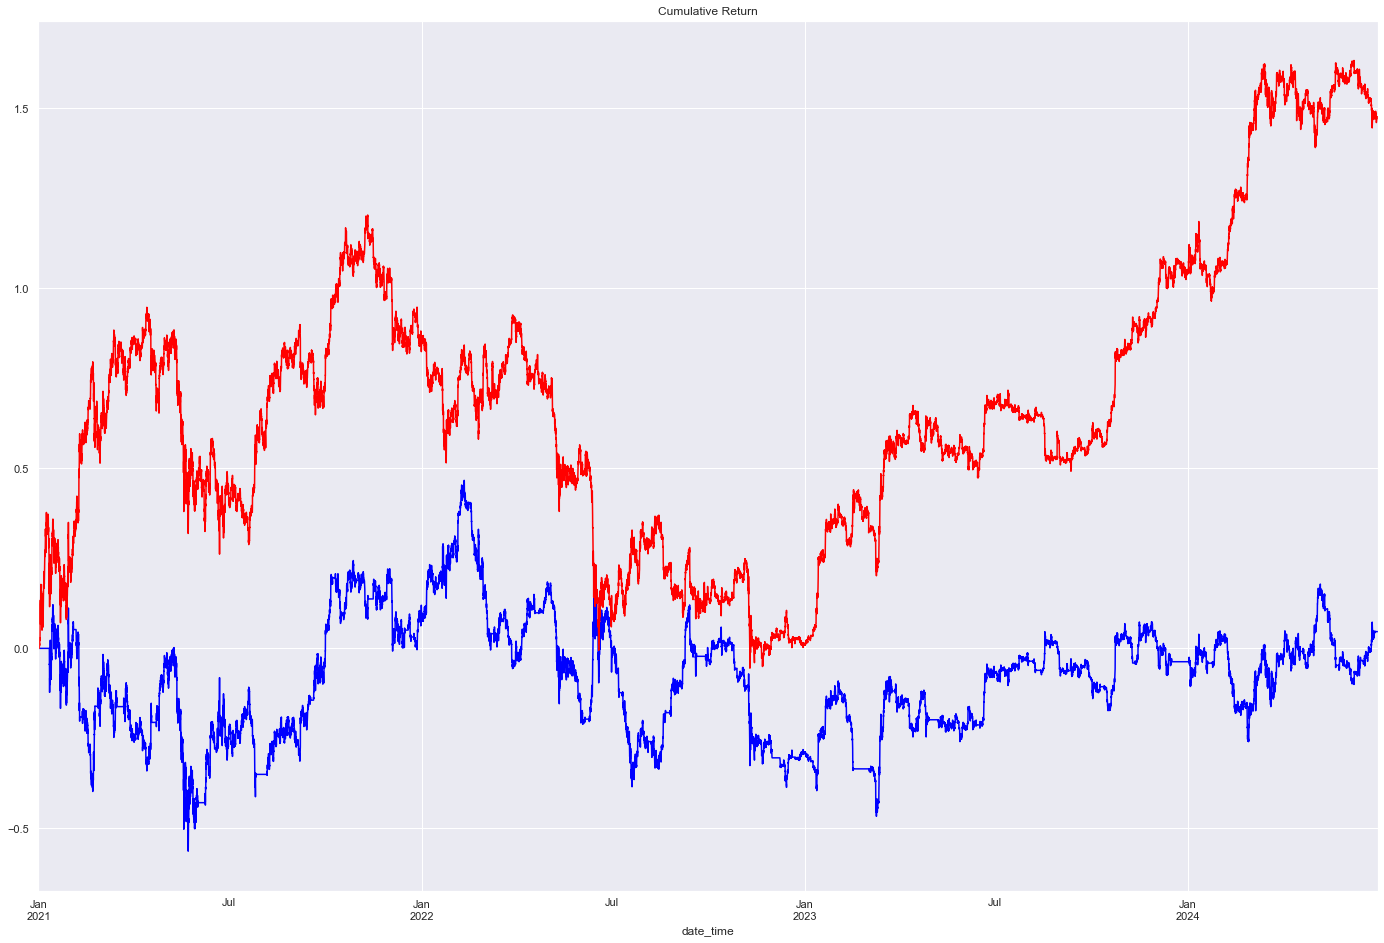

In [10]:
test['return'].cumsum().plot(color='blue', label='cumulative return', title='Cumulative Return', grid=True)
binance_df['close'].loc[start:end].pct_change().cumsum().plot(color = 'red', label='benchmark', grid=True)

In [11]:
train_result = test.loc[start:start + (end-start) * 0.7]
test_result = test.loc[start + (end-start) * 0.7:]

In [12]:
tool.generate_metrics_indexed(train_result,'train',periods=365*24)
tool.generate_metrics_indexed(test_result,'test',periods=365*24)
tool.generate_metrics_indexed(test,'full',periods=365*24)


train
Cumulative Return:	-51.27%
Sharpe:			-0.13
CAGR:			-25.46%
MDD:			-66.66%
Calmar:			-0.38

test
Cumulative Return:	17.84%
Sharpe:			0.59
CAGR:			16.99%
MDD:			-29.89%
Calmar:			0.57

full
Cumulative Return:	-42.57%
Sharpe:			0.02
CAGR:			-14.67%
MDD:			-66.66%
Calmar:			-0.22


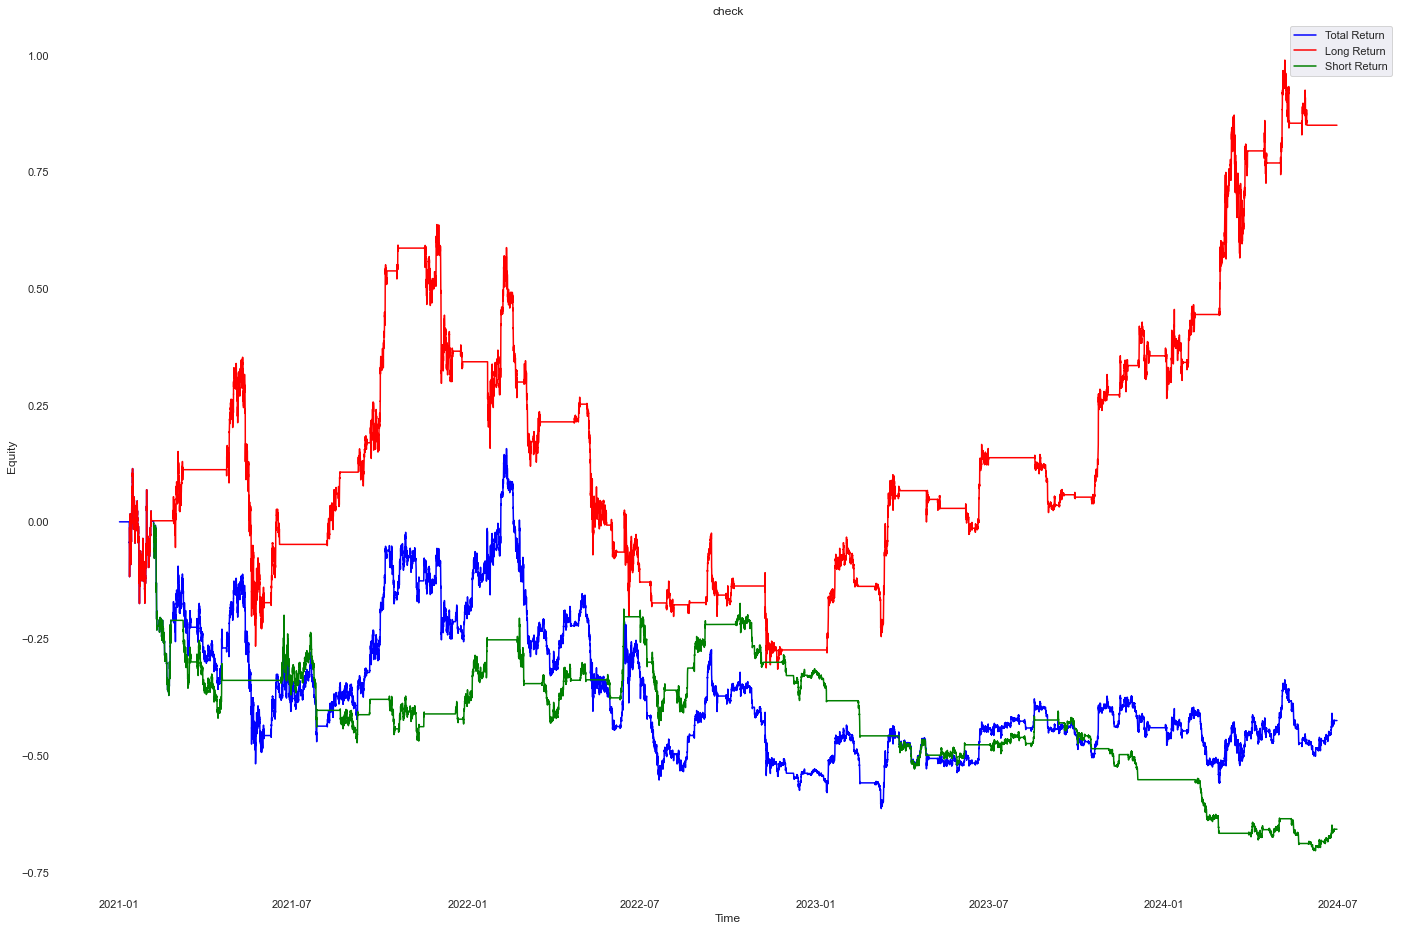

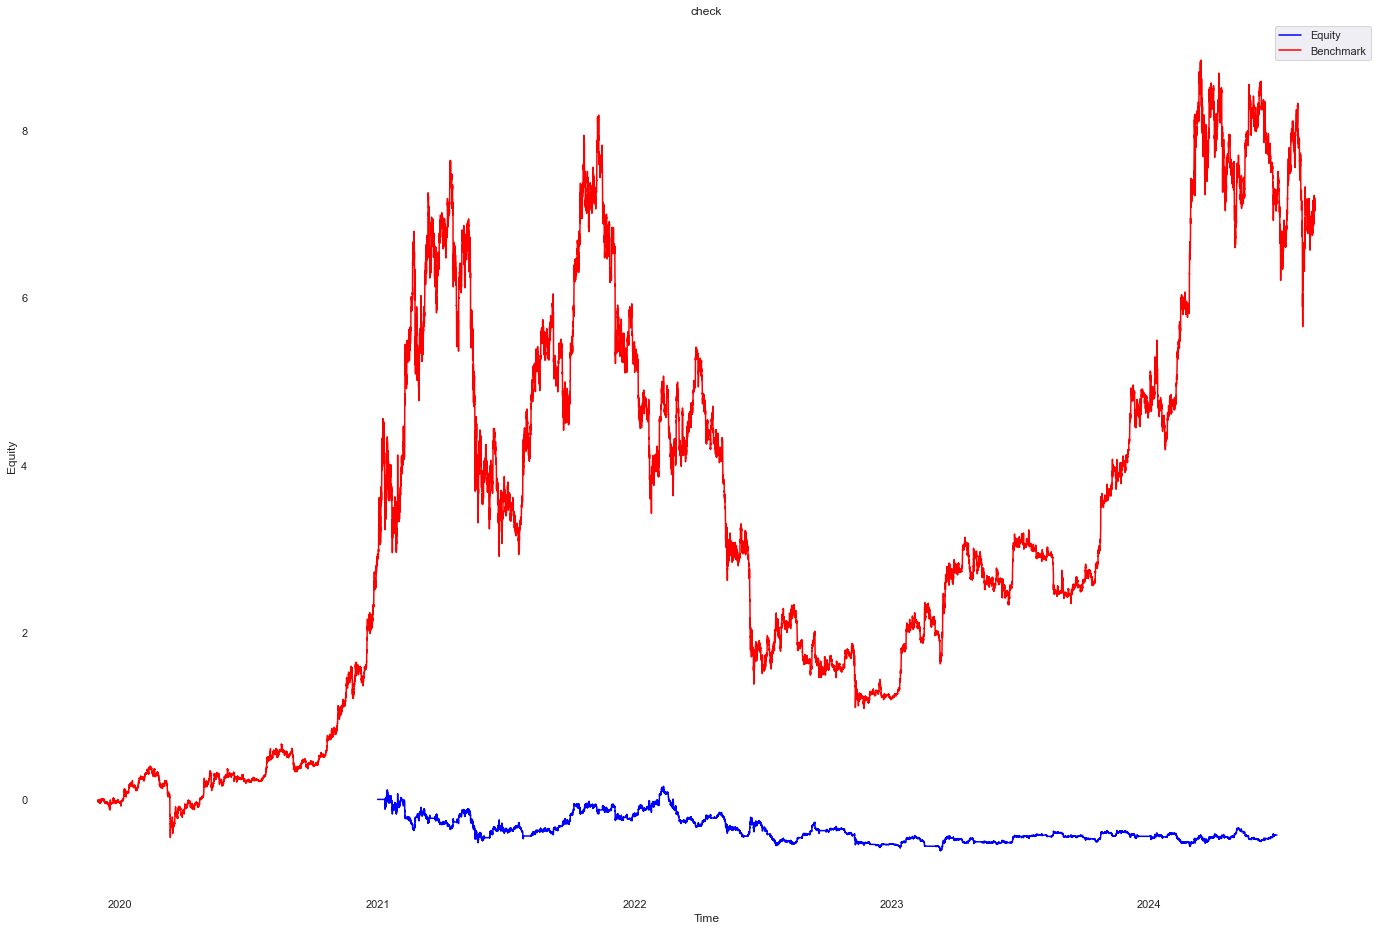

In [13]:
tool.plots_cum_return(test,'check','normal')
tool.plots_Equity(test, combined_df,'check','normal')

In [ ]:
## generate quantstats report
qs.reports.html(test['return'])